<a href="https://colab.research.google.com/github/Anand11500/Hotel-booking-analysis/blob/main/Copy_of_Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name - Hotel Booking Anaysis**

##### **Project Type**    - EDA
##### **Contribution**    - Team 

**Team Member 1 -** Anand Salunkhe

**Team Member 2 -** Pavan Patil

## **Project Summary -**

The hotel booking project involves analyzing a dataset containing information about hotel bookings, including customer demographics, booking information, and hotel details. The goal of the project is to use exploratory data analysis (EDA) techniques to gain insights and identify patterns in the data.
   
   The EDA process includes data cleaning and preparation, visualizing the data with graphs and charts, and performing statistical analysis to uncover relationships and correlations. Key findings from the EDA may include trends in booking patterns, popular destinations, peak travel seasons, and customer demographics.


# **GitHub Link -**

https://github.com/Anand11500

# **Problem Statement**


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
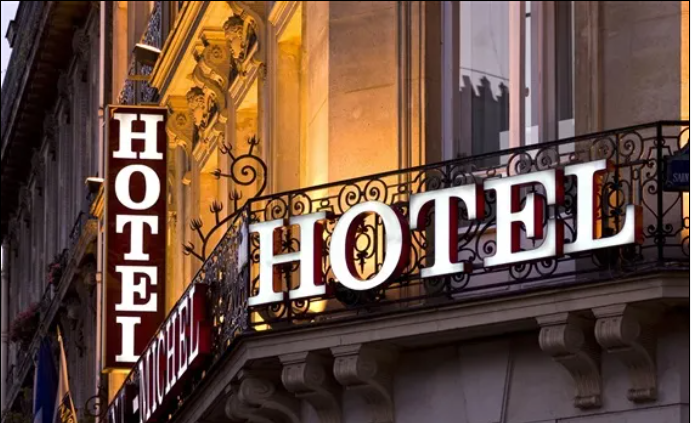

#### **Define Your Business Objective?**

buisness objectives for hotel booking analysis can vary depending on the specific needs and goals of the hotel or booking platform. However, some common objectives include:

**1**.Increasing occupancy rates: One key objective for hotels is to increase their occupancy rates, which can be achieved by analyzing booking patterns and optimizing pricing and marketing strategies accordingly.

**2.**Improving revenue management: Analyzing hotel booking data can provide insights into demand trends and help optimize pricing strategies, which can improve revenue management.

**3.**Enhancing customer satisfaction: By analyzing customer feedback and booking patterns, hotels can identify areas for improvement and make changes to enhance the guest experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

 ***1. Know  Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
hotel_data = pd.read_csv("/content/drive/MyDrive/capstone project1/Hotel Bookings.csv")    

### Dataset First View

In [ ]:
# Dataset First Look
hotel_data.head()

In [ ]:
hotel_data.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
hotel_data.shape

### Dataset Information

In [ ]:
# Dataset Info
hotel_data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df=hotel_data.copy()
df[df.duplicated()].shape


In [ ]:
df.drop_duplicates(inplace = True)
df.shape

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()


In dataset column name company,country,agent have null values

In [ ]:
# Visualizing the missing values
df[['company','agent']]=df[['company','agent']].fillna(0)
df[['company','agent']].head(10)
                            

In [ ]:
df[["company","agent"]].isnull().sum()

WE handle the null values of company and agent column by placing '0'.company and agent column have null values because There may be a situation that the customer booked hotel room via another platform than company or agent


In [ ]:
df["children"].fillna(df["children"].mean(),inplace=True)

In [ ]:
df["children"].isnull().sum()

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So, 'nan' values are the missing values due to error of recording data.


Next,Column having null values is "country".country column have data of string datatype. so , we handle Null values by "Other"

In [ ]:
df["country"].fillna("Other",inplace=True)

In [ ]:
df["country"].isnull().sum()

In [ ]:
df.isnull().sum().sort_values(ascending =False)[:5]

### What did you know about your dataset?

For this project we will analysing the hotel booking data.this data set contain the information of resort hotel and city hotel and information include when booking was made and length of stay,parking requirement,customer information contain how many adults and babies ,children present.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

Answer Here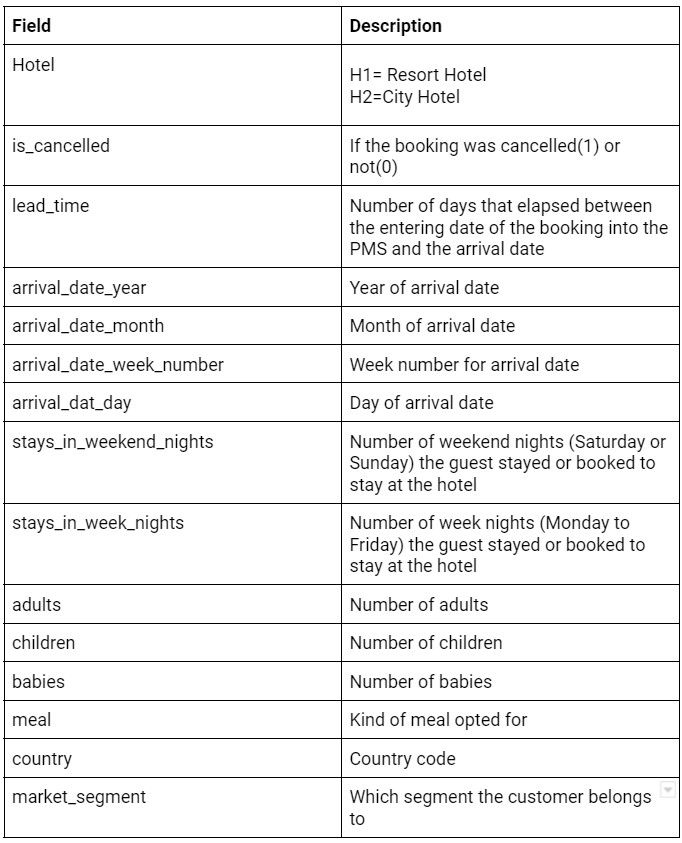

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df["hotel"].unique()

In [ ]:
df["is_canceled"].unique()

In [ ]:
df["lead_time"].unique()

In [ ]:
df["arrival_date_year"].unique()

In [ ]:
df["is_repeated_guest"].unique()

In [ ]:
df["meal"].unique()

In [ ]:
df["distribution_channel"].unique()

In [ ]:
df["reservation_status"].unique()

In [ ]:
df["adr"].unique()

In [ ]:
df["required_car_parking_spaces"].unique()

### Data Wrangling Code

## 3. ***Data Wrangling***

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
df[df['adults']+df['babies']+df['children'] == 0].shape

In [ ]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

Converting datatype of columns 'children', 'company' and 'agent' from float to int.

In [ ]:
df[['children','babies','adults']].astype('int64')

 changing datatype of column 'reservation_status_date' to data_type.

In [ ]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'],format='%Y-%m-%d')

Adding important columns.

In [ ]:
#Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
#Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

### What all manipulations have you done and insights you found?

In [ ]:
df['Total_members'] = df.adults + df.children + df.babies

In [ ]:
d1=df.loc[df.Total_members > 20, 'Total_members']
d1



*   There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.
*   Converting datatype of columns 'children', 'company' and 'agent' from float to int.
*   changing datatype of column 'reservation_status_date' to date_time format
*   Adding important columns to ease the analysis





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Is it possible that total stay could have an impact on adr?


In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

In [ ]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

In [ ]:
df1=df

In [ ]:
df1['adr'].max()

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

##### 1. Why did you pick the specific chart?

A scatterplot is a type of data visualization that can be used to display the relationship between two variables. This type of chart is most often used when there is a linear relationship between the two variables, such as when one variable increases as the other variable increases. Scatterplots can also be used to identify clusters of data points or outliers that may not be immediately apparent in other types of charts.Answer Here.

## Chart - 2  what is the stay length for Resort hotel and city hotel?



In [ ]:
not_canceled = df[df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]         #limiting full stay to less than 15
plt.figure(figsize = (15,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.title('Stay length in hotels',fontweight="bold", size=20)
# not_canceled
# df['total_stay'].max()

##### 1. Why did you pick the specific chart?




*   The countplot chart is a useful chart for displaying the frequency of a particular category. 
*    The countplot chart provides a simple, easy to understand visual representation of the data.



##### 2. What is/are the insight(s) found from the chart?

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

# Chart - 3 What is percentage of bookings in each hotel?

In [ ]:
# Chart - 3 visualization code
grouped_by_hotel = df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})   
d1   #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'])
plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific barplot chart because it clearly illustrates the data. It is easy to compare the differences between each group, and it also allows for a quick comparison of the overall results. 

##### 2. What is/are the insight(s) found from the chart?

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

#### Chart - 4  From which country most no. of bookings are make?

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize = (10,5))

sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index))
plt.title("Number of bookings country wise",fontweight="bold", size=20)

##### 1. Why did you pick the specific chart?

I picked the specific barplot chart because it clearly illustrates the data. It is easy to compare the differences between each group, and it also allows for a quick comparison of the overall results.



##### 2. What is/are the insight(s) found from the chart?

Most guest are from Portugal and other Europian contries.

## Chart - 5 Which room type is in most demand and which room type generatest 


In [ ]:
# Chart - 5 visualization code
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
df['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df['adr'])
plt.show()


##### 1. Why did you pick the specific chart?

A count plot is a type of data visualization that allows you to quickly and easily view the frequency of items or **categories** in a dataset. It is a bar chart that displays the count of items in each category. Count plots are useful for understanding the distribution of a categorical variable and for determining if there are any significant differences between the **categories**

##### 2. What is/are the insight(s) found from the chart?

Most demanded room type is A, but better adr rooms are of type H, G . Hotels should increase the no. of room types A and H to maximise revenue.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12,5))
sns.lineplot(data = df, x = 'arrival_date_month', y = 'adr', hue = 'hotel',sort =True, marker ='^')
plt.title('Average daily rate month wise',fontweight ='bold',size =20)

##### 1. Why did you pick the specific chart?

Line plots can be used to compare trends over time, visualize changes in distribution, or highlight differences between groups. They are often used to display data in a clear and concise manner and give viewers a quick overview of the data.

##### 2. What is/are the insight(s) found from the chart?

For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

#### Chart - 7

# Chart - 7  Which hotel has longer waiting time?


In [ ]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

##### 1. Why did you pick the specific chart?

It is useful for comparing different data sets or making comparisons between different groups

##### 2. What is/are the insight(s) found from the chart?

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

Chart - 8  Which food is preferably ordered ?

In [ ]:
df['meal'].unique()

In [ ]:
# Chart - 8 visualization code
plt.subplot(1,1,1)
meal_typ =df['meal'].value_counts()
meal_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*5)
plt.title('Favourite food type',fontweight="bold", size=20)

##### 1. Why did you pick the specific chart?

To show the variety of data of same category

##### 2. What is/are the insight(s) found from the chart?

IN hotels 78% consume menu is BB and second most is SC

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
plt.subplot(1,1,1)
Repeated = df.is_repeated_guest .value_counts()
Repeated.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*2)
plt.title('Repeated guests', fontweight ='bold', size =20);

##### 1. Why did you pick the specific chart?

It is easy to show percentage of distributed data using  Pie-chart.

##### 2. What is/are the insight(s) found from the chart?

Only 4% people are repeated guests. The guest retention rate is very low.

#### Chart - 10

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3


In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Almost 30 % of City Hotel bookings got canceled.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
plt.subplot(1,1,1 )
booking_distibution_typ =df['distribution_channel'].value_counts()
booking_distibution_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'}, pctdistance=0.5,explode = [0.05]*5)
plt.title('Booking % by distribution channel', fontweight ='bold', size =20);

##### 2. What is/are the insight(s) found from the chart?

Most 79% people prefer'TA/TO' for booking

 **Chart - 12 - Correlation Heatmap**


In [ ]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

In [ ]:
#  The correlation between the numerical data.
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1,square=True);

##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical representation of the pairwise correlations between variables in a dataset. The heatmap displays the correlation coefficients between each pair of variables as a color-coded matrix, where darker colors indicate higher correlation coefficients.

##### 2. What is/are the insight(s) found from the chart?

1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

 Chart - 13 - Pair Plot 

In [ ]:
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pair plots are useful for exploring the relationships between multiple variables in a dataset and identifying patterns and correlations. They can be used to identify which variables are most strongly correlated, as well as any outliers or clusters that may exist in the data.

##### 2. What is/are the insight(s) found from the chart?

We found out all pattern and correlation of all features


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
**1**.Define the research question: Before starting the analysis, it is important to define the research question clearly. The research question should align with the business objective, and should be specific and measurable.

**2**.Collect data: The next step is to collect data related to hotel bookings. The data should include relevant variables such as booking date, check-in date, check-out date, number of guests, room type, booking channel, etc. The data can be collected from various sources such as hotel booking websites, APIs, or third-party data providers.

**3**.Clean and preprocess data: Once the data is collected, it needs to be cleaned and preprocessed. This involves identifying and handling missing values, removing duplicates, and transforming data into the desired format. It is also important to check for outliers and anomalies, and remove or correct them as necessary.

**4**.Explore the data: The next step is to explore the data using EDA techniques. This involves analyzing the distribution of variables, identifying patterns, correlations, and relationships between variables. This can be done using various tools such as histograms, scatter plots, heat maps, etc.

**5**.Draw insights: Based on the EDA, the client can draw insights and conclusions about the hotel booking data. For example, the client may identify the most popular booking channels, the busiest days of the week, the most common room types, etc. These insights can be used to make informed business decisions.

# **Conclusion**

**1.**Most guest are from Portugal and other Europian contries.   

**2** Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

**3.**Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

**4**.Most guest are from Portugal and other Europian contries.

**5**.Most demanded room type is A, but better adr rooms are of type H, G . Hotels should increase the no. of room types A and H to maximise revenue.

**6**. For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

**7**.City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

**8**.IN hotels 78% consume menu is BB and second most is SC

**9**.Only 4% people are repeated guests. The guest retention rate is very low

**10**.Only 4% people are repeated guests. The guest retention rate is very low

**11**.Only 4% people are repeated guests. The guest retention rate is very low

**12**.1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual ar

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***